In [61]:
import pandas as pd

In [62]:
import pandas as pd
df = pd.read_excel("C:/Users/Administrator/Desktop/909/df.xlsx")
print(df)

      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730              NamlÛ± Gurme           208         ÛÁstanbul   
9547        5908749             Ceviz AÛôacÛ±           208         ÛÁstanbul   
9548        5915807                     Huqqa           208         ÛÁstanbul   
9549        5916112              Aôôk Kahve           208         ÛÁstanbul   
9550        5927402  Walter's Coffee Roastery           208         ÛÁstanbul   

                           

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [65]:
df=pd.get_dummies(df,columns=['Has Table booking','Has Online delivery'],drop_first=True)

In [67]:
features=['Average Cost for two','Votes','Price range','Has Table booking_Yes','Has Online delivery_Yes']
target='Rating'
x=df[features]
y=df[target]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [70]:
models={
    "Linear Regression":LinearRegression(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest":RandomForestRegressor()
}

for model_name, model in models.items():
    model.fit(x_train,y_train)
    
    y_pre=model.predict(x_test)
    
    mean_squ=mean_squared_error(y_test,y_pre)
    
    r2=r2_score(y_test,y_pre)
    
    print(f"Model:{model_name}")
    print(f"Mean Squared Error:{mean_squ}")
    print(f"R-squared:{r2}")
    print("--------------------------")

Model:Linear Regression
Mean Squared Error:0.8962456916425035
R-squared:0.28971628953199
--------------------------
Model:Decision Tree
Mean Squared Error:0.20670948506412767
R-squared:0.8361806573695139
--------------------------
Model:Random Forest
Mean Squared Error:0.13346526148834678
R-squared:0.8942274400507362
--------------------------


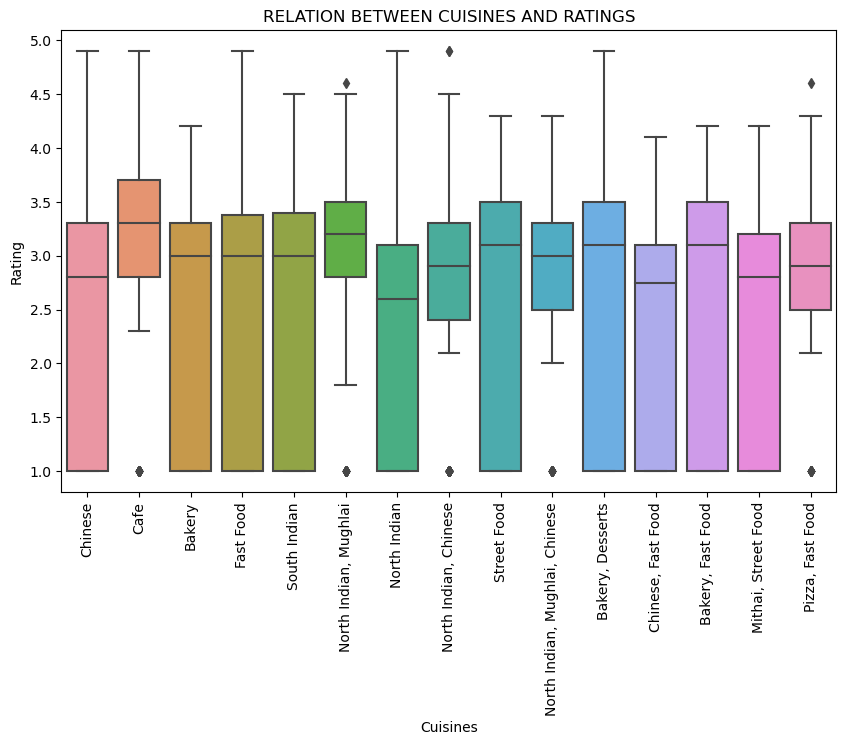

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

top=15
topc=df['Cuisines'].value_counts().nlargest(top).index
df_sort=df[df['Cuisines'].isin(topc)]

plt.figure(figsize=(10,6))
sns.boxplot(data=df_sort,x='Cuisines',y='Rating')
plt.xticks(rotation=90)
plt.xlabel('Cuisines')
plt.ylabel('Rating')
plt.title("RELATION BETWEEN CUISINES AND RATINGS")
plt.show()

In [73]:
pop_cuisine=df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)
print("MOST POPULAR CUISINES BASED ON VOTES:")
print(pop_cuisine.head(5))

MOST POPULAR CUISINES BASED ON VOTES:
Cuisines
North Indian, Mughlai    53747
North Indian             46241
North Indian, Chinese    42012
Cafe                     30657
Chinese                  21925
Name: Votes, dtype: int64


In [74]:
higher_rating_of_cuisines=df.groupby('Cuisines')['Rating'].mean().sort_values(ascending=False)
print("cuisines that tend to receive higher ratings:")
print(higher_rating_of_cuisines.head(30))

cuisines that tend to receive higher ratings:
Cuisines
Italian, Deli                            4.900000
Hawaiian, Seafood                        4.900000
American, Sandwich, Tea                  4.900000
Continental, Indian                      4.900000
European, Asian, Indian                  4.900000
European, Contemporary                   4.900000
European, German                         4.900000
BBQ, Breakfast, Southern                 4.900000
American, Coffee and Tea                 4.900000
Sunda, Indonesian                        4.900000
American, Burger, Grill                  4.900000
Mughlai, Lucknowi                        4.900000
Mexican, American, Healthy Food          4.900000
American, Caribbean, Seafood             4.900000
Burger, Bar Food, Steak                  4.900000
Italian, Bakery, Continental             4.900000
World Cuisine                            4.900000
American, BBQ, Sandwich                  4.900000
Filipino, Mexican                        4.85

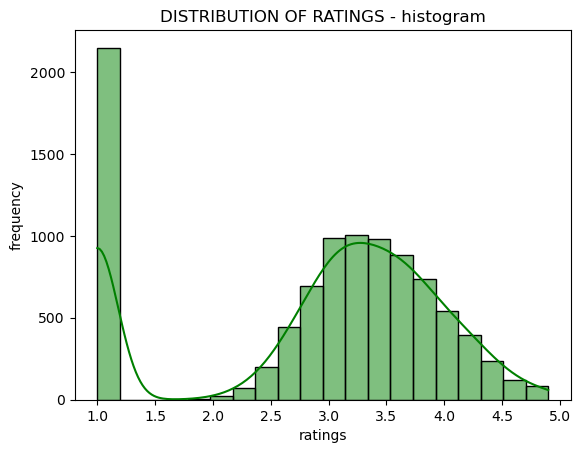

In [76]:
sns.histplot(df['Rating'],bins=20,kde=True,color='green')
plt.xlabel('ratings')
plt.ylabel('frequency')
plt.title('DISTRIBUTION OF RATINGS - histogram')
plt.show()

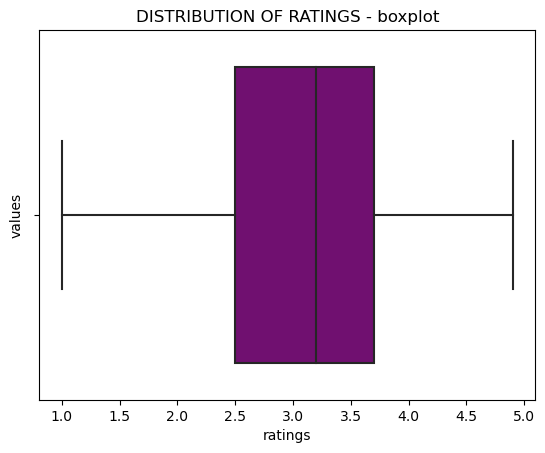

In [83]:
sns.boxplot(x='Rating',data=df,color='purple')
plt.xlabel('ratings')
plt.ylabel('values')
plt.title('DISTRIBUTION OF RATINGS - boxplot')
plt.show()

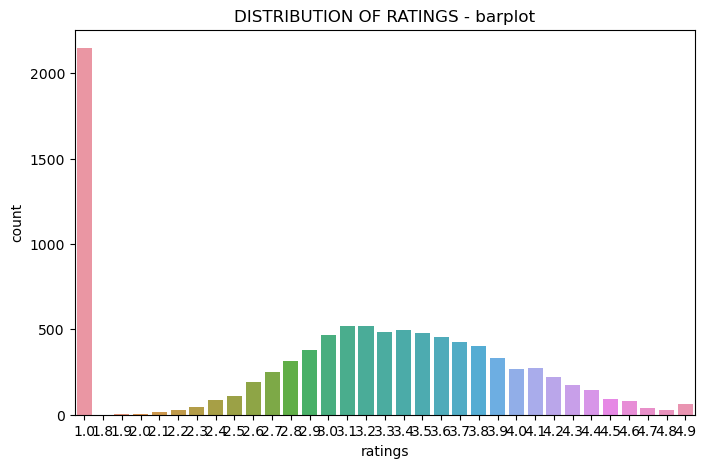

In [89]:
plt.figure(figsize=(8,5))
sns.countplot(x='Rating',data=df)
plt.xlabel('ratings')
plt.ylabel('count')
plt.title('DISTRIBUTION OF RATINGS - barplot')
plt.show()

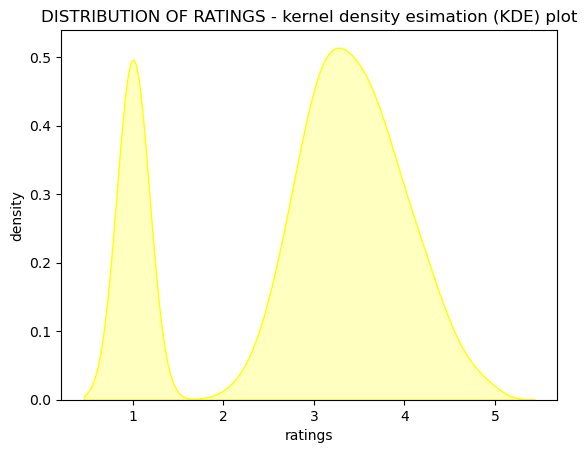

In [90]:
sns.kdeplot(df['Rating'],fill=True,color='yellow')
plt.xlabel('ratings')
plt.ylabel('density')
plt.title('DISTRIBUTION OF RATINGS - kernel density esimation (KDE) plot')
plt.show()

In [96]:
average_ratings_by_cuisine=df.groupby('Cuisine')['Rating'].mean()
average_ratings_by_city=df.groupby('City')['Rating'].mean()

KeyError: 'Cuisine'

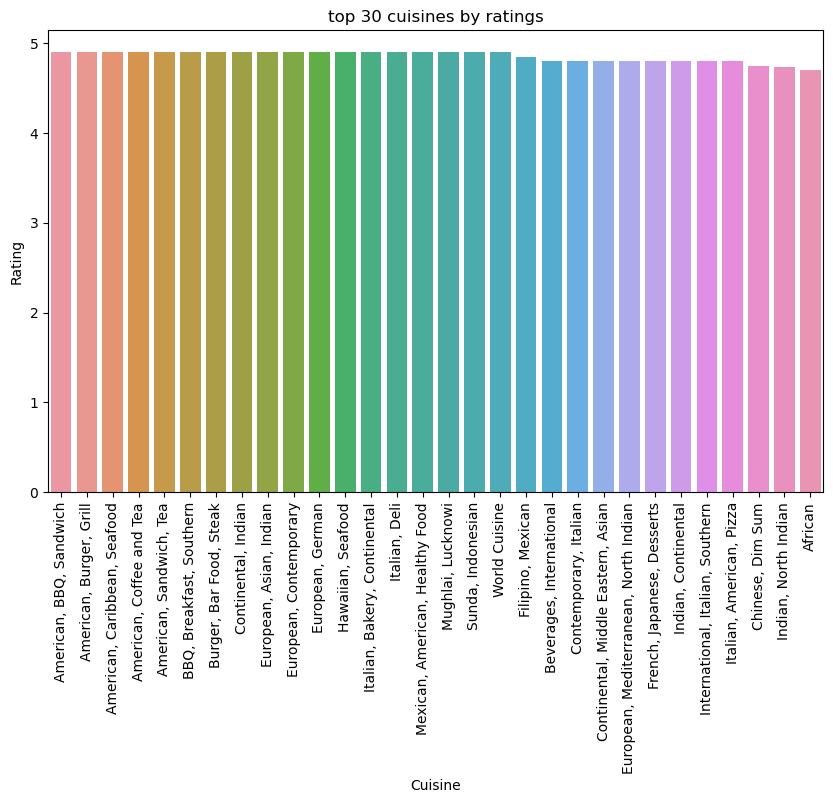

In [92]:
top_30_cuisines=average_ratings_by_cuisine.nlargest(30)
plt.figure(figsize=(10,6))
sns.barplot(x=top_30_cuisines.index,y=top_30_cuisines.values)
plt.xlabel('Cuisine')
plt.ylabel('Rating')
plt.title('top 30 cuisines by ratings')
plt.xticks(rotation=90)
plt.show()

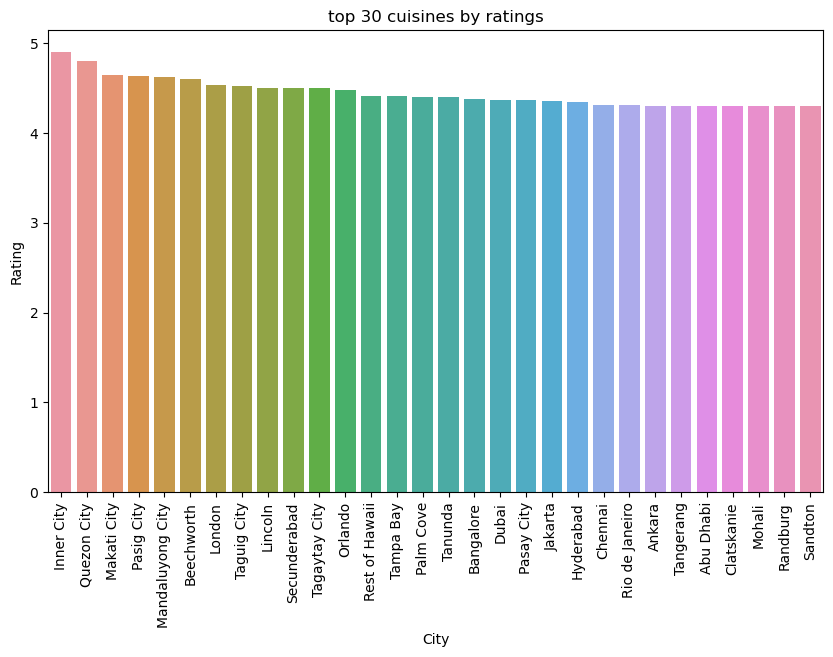

In [93]:
top_30_cities=average_ratings_by_city.nlargest(30)
plt.figure(figsize=(10,6))
sns.barplot(x=top_30_cities.index,y=top_30_cities.values)
plt.xlabel('City')
plt.ylabel('Rating')
plt.title('top 30 cuisines by ratings')
plt.xticks(rotation=90)
plt.show()

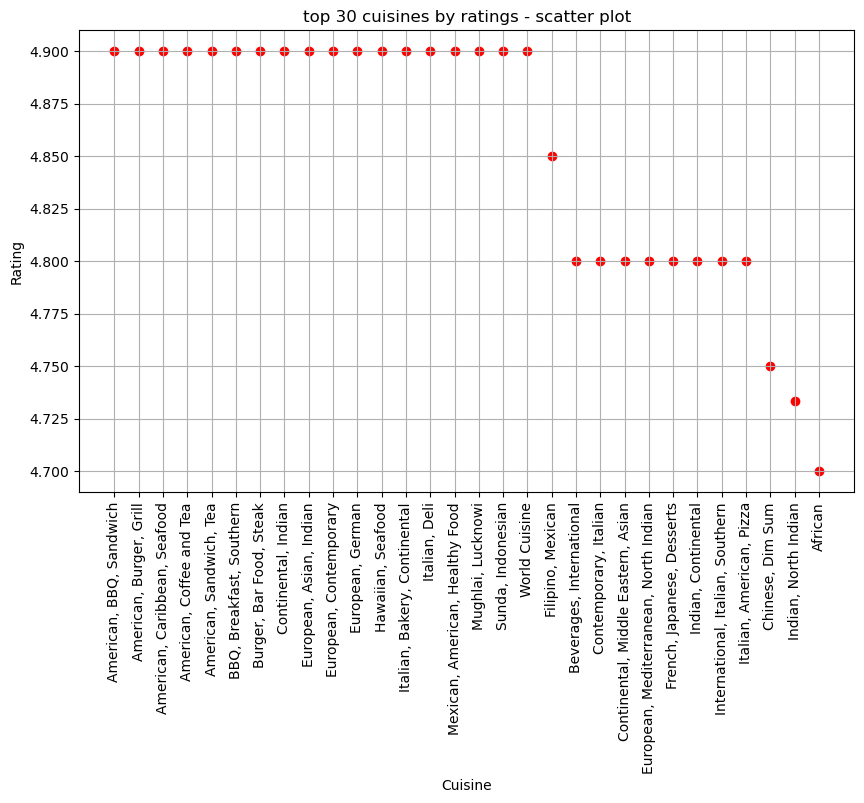

In [98]:
average_ratings_by_cuisine=df.groupby('Cuisines')['Rating'].mean()
top_30_cuisines=average_ratings_by_cuisine.nlargest(30)

plt.figure(figsize=(10,6))
plt.scatter(x=top_30_cuisines.index,y=top_30_cuisines.values,color='red')
plt.xlabel('Cuisine')
plt.ylabel('Rating')
plt.title('top 30 cuisines by ratings - scatter plot')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

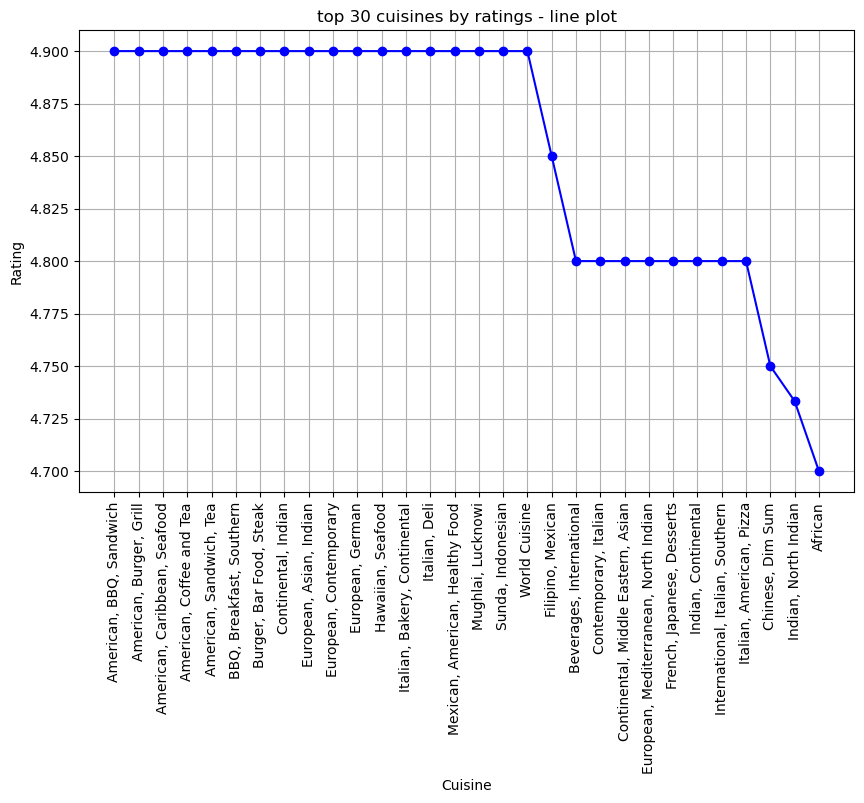

In [101]:
average_ratings_by_cuisine=df.groupby('Cuisines')['Rating'].mean()
top_30_cuisines=average_ratings_by_cuisine.nlargest(30)

plt.figure(figsize=(10,6))
plt.plot(top_30_cuisines.index,top_30_cuisines.values,marker='o',color='blue')
plt.xlabel('Cuisine')
plt.ylabel('Rating')
plt.title('top 30 cuisines by ratings - line plot')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

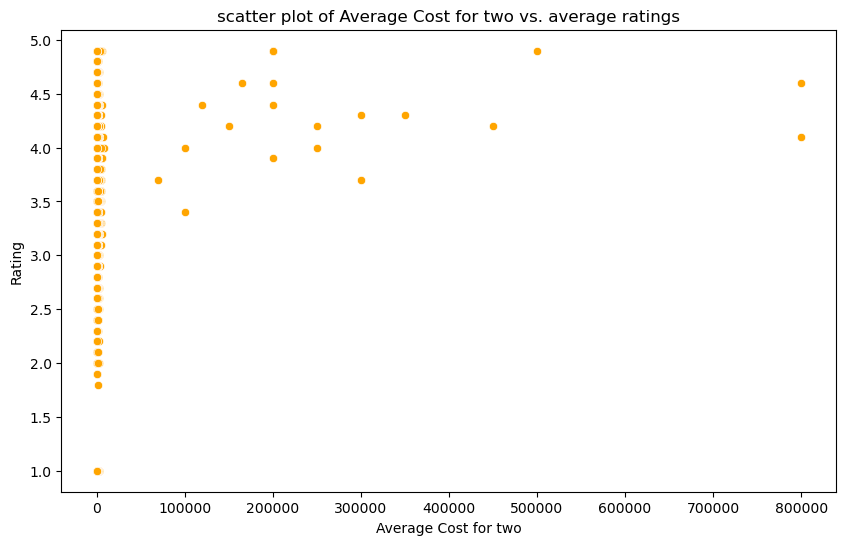

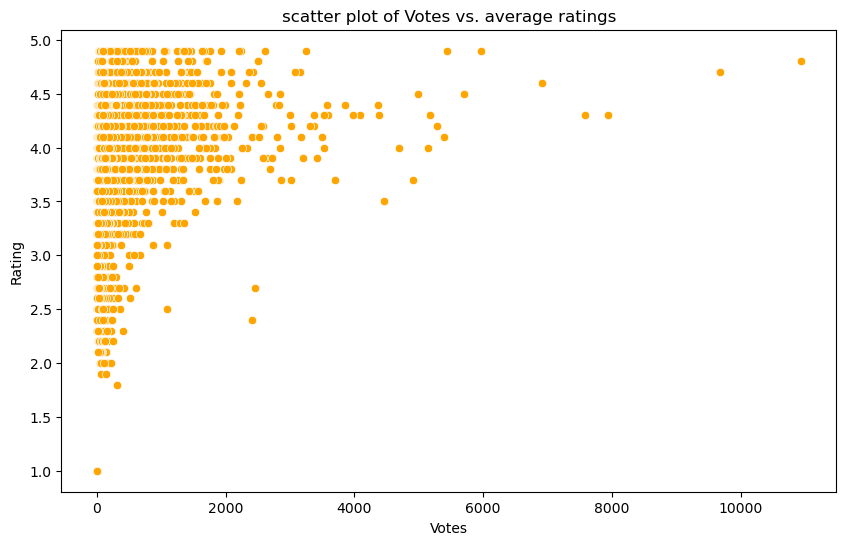

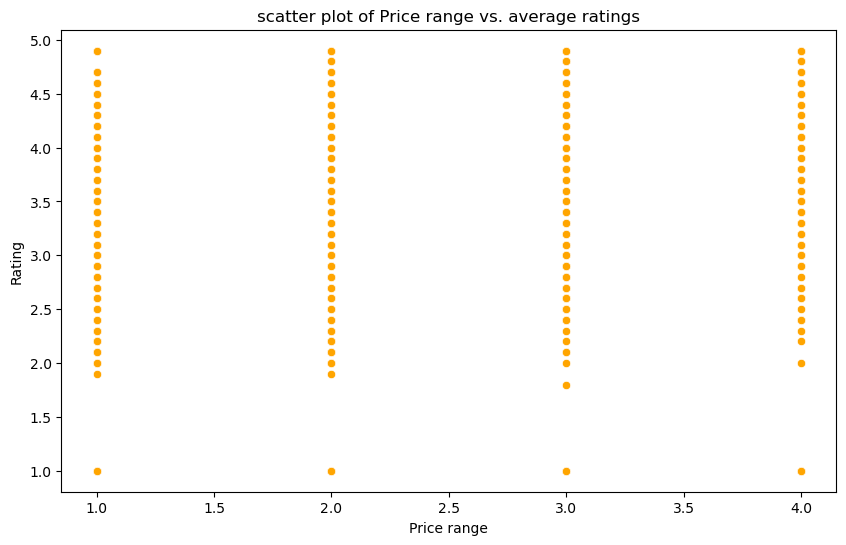

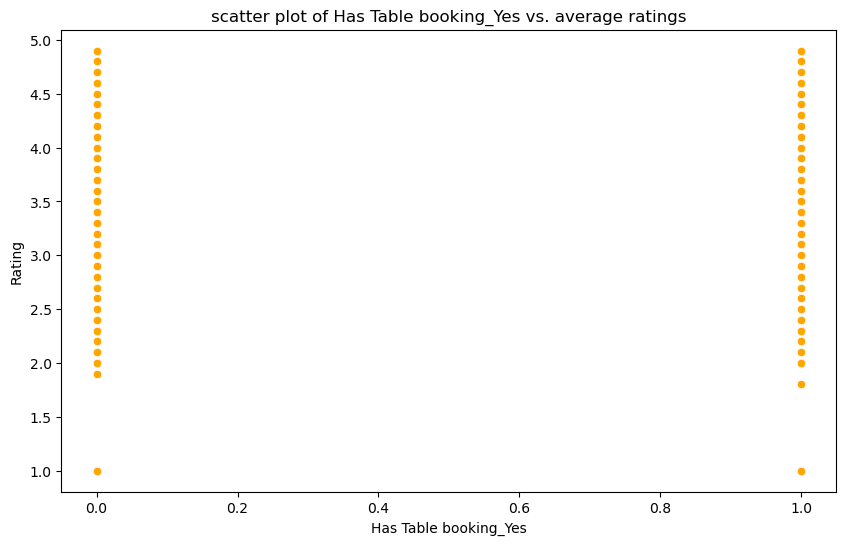

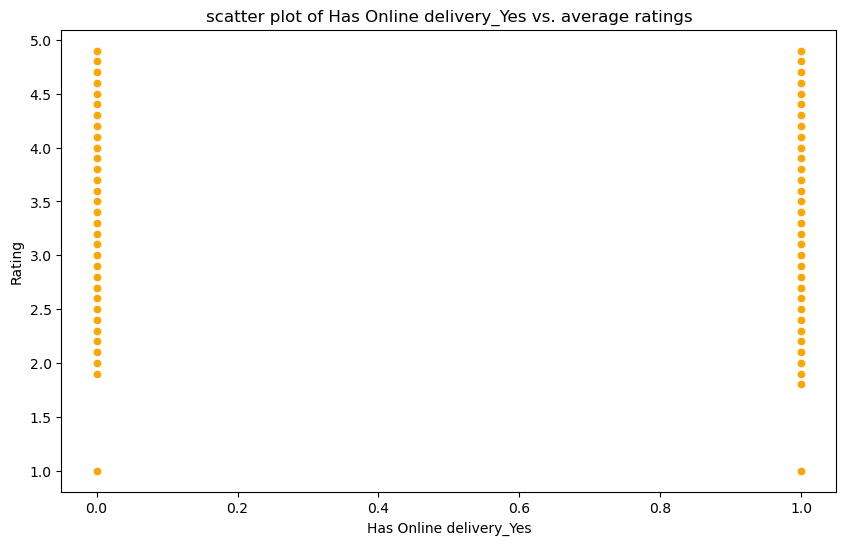

In [105]:
for feature in features:
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=df[feature],y=df[target],color='orange')
    plt.xlabel(feature)
    plt.ylabel('Rating')
    plt.title(f"scatter plot of {feature} vs. average ratings")
    plt.show()